Testing CNN model

In [1]:
import tensorflow as tf
import pandas as pd

from keras import Sequential, layers, callbacks, losses, utils, applications
from keras.preprocessing import image_dataset_from_directory

Preprocess data and create the training and validation split 80% / 20%.

In [2]:
img_height = 224
img_width = 224

batch_size = 32

seed = 123

data_dir = "../data/tests/flower_photos"

input_shape = [img_height,img_width, 3]

ds_train = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=seed,
    subset="training",
    image_size=(img_height,img_width),
    batch_size=batch_size
    )
ds_valid= image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=seed,
    subset="validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

class_names = ds_train.class_names # type: ignore
num_classes = 5

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


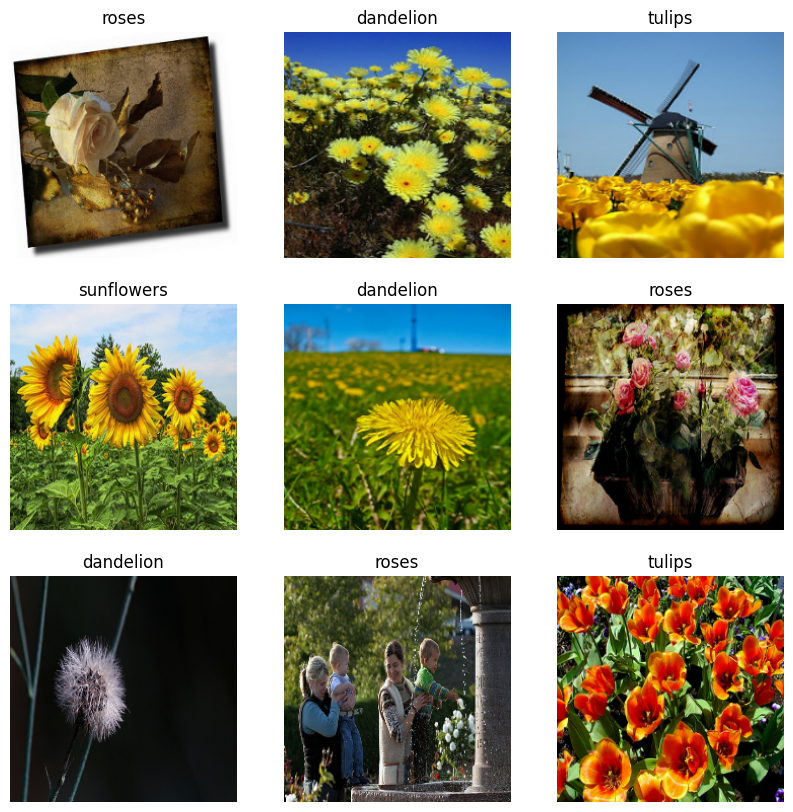

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
%%capture
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_valid = ds_valid.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
body = applications.VGG16()
body.trainable = False

In [7]:

layers = [
    body,
    # Classifier head
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    #layers.Dropout(rate=0.2),
    layers.Dense(num_classes),
]

asdasd

In [8]:
model = Sequential(layers=layers)

early_stopping = callbacks.EarlyStopping(patience=5,
                                      min_delta=0.001,restore_best_weights=True)
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Train the model

In [9]:

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    callbacks=[early_stopping],
    epochs=40,
)

Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4816 - loss: 1.3444 - val_accuracy: 0.6417 - val_loss: 1.0382
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6672 - loss: 0.8871 - val_accuracy: 0.6730 - val_loss: 0.8922
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7200 - loss: 0.7645 - val_accuracy: 0.6894 - val_loss: 0.8605
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7452 - loss: 0.6999 - val_accuracy: 0.6962 - val_loss: 0.8518
Epoch 5/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7612 - loss: 0.6526 - val_accuracy: 0.7044 - val_loss: 0.8545
Epoch 6/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7759 - loss: 0.6149 - val_accuracy: 0.7084 - val_loss: 0.8627
Epoch 7/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7902 - loss: 0.5835 - val_accuracy: 0.7098 - val_loss: 0.8752
Epoch 8/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7990 - loss: 0.5564 - val_accuracy: 0.7057 - v

<Axes: >

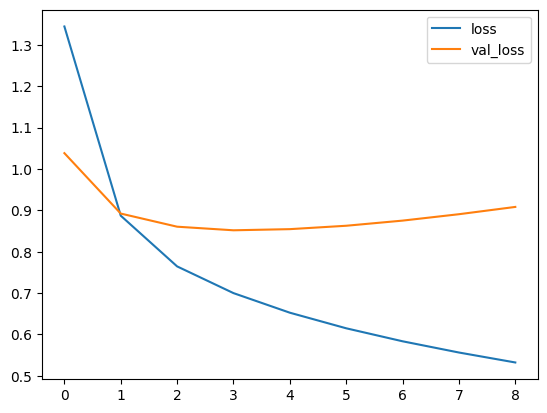

In [10]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()